In [65]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('ggplot')
# plt.rcParams['figure.figsize'] = (23,10)

In [66]:
df = pd.read_excel('Canada.xlsx',1, skiprows = range(20), skipfooter = 2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [67]:
df.drop(['AREA','REG','DEV','Type','Coverage','DevName'], axis=1, inplace=True)
df.rename(columns = {'OdName':'country','AreaName':'continent','RegName':'region'}, inplace = True)
df['total'] = df.sum(axis = 1)
df = df.set_index('country')
df.rename(index = {'United Kingdom of Great Britain and Northern Ireland':'UK & Ireland'}, inplace = True)
df.columns = df.columns.astype(str)
# Useful for upcoming visualizations
years = list(map(str, range(1980,2013)))

In [68]:
df.head()

,continent,region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


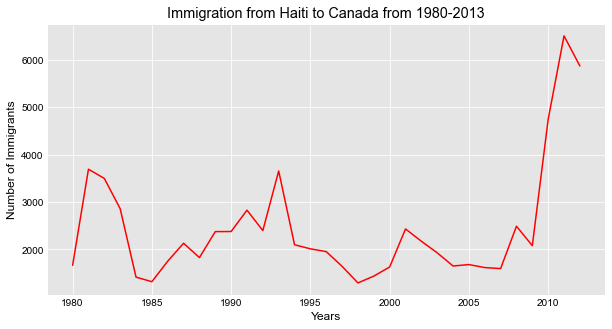

In [91]:
# Single line chart
plt.figure(figsize=(10, 5))
fig1 = df.loc['Haiti', years].plot(kind = 'line', color = 'r')
plt.title('Immigration from Haiti to Canada from 1980-2013',color = 'black')
plt.xlabel('Years',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('linechart_single.png')
plt.show()

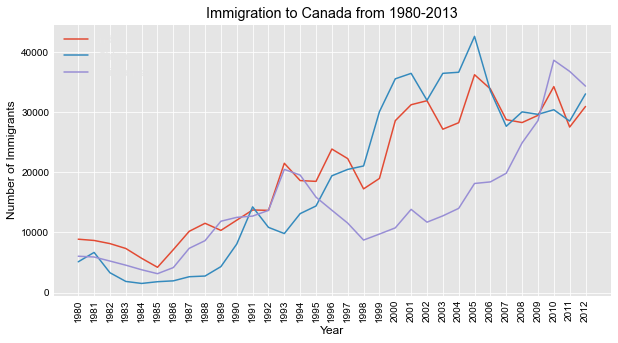

In [92]:
# Multiple lines
plt.figure(figsize=(10, 5))
fig2 = plt.plot(df.loc['India',years], label = 'India')
plt.plot(df.loc['China',years], label = 'China')
plt.plot(df.loc['Philippines',years], label = 'Sri Lanka')
plt.legend(loc = 'upper left', fontsize = 12)
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')
plt.title('Immigration to Canada from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.savefig('linechart_multiple.png')
plt.show()

In [93]:
!pip install mplcyberpunk

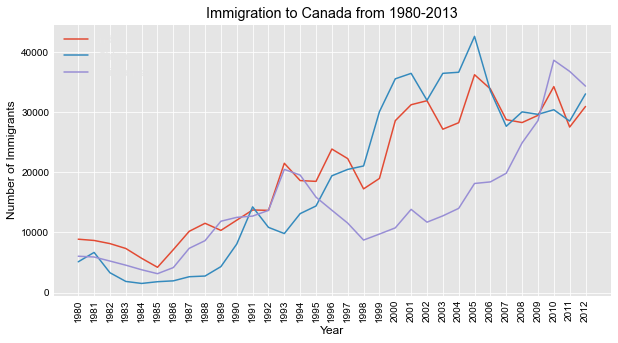

In [94]:
# Multiple lines
plt.figure(figsize=(10, 5))
fig2 = plt.plot(df.loc['India',years], label = 'India')
plt.plot(df.loc['China',years], label = 'China')
plt.plot(df.loc['Philippines',years], label = 'Sri Lanka')
plt.legend(loc = 'upper left', fontsize = 12)
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')
plt.title('Immigration to Canada from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.savefig('linechart_multiple.png')
plt.show()

<Figure size 14400x7200 with 0 Axes>

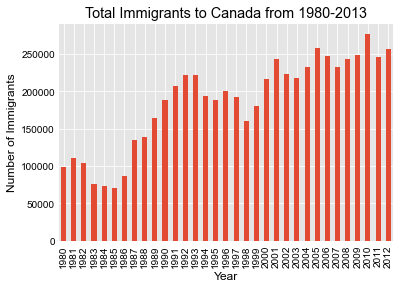

In [73]:
# Vertical
plt.figure(figsize=(10, 5))
style.use('ggplot')
df_tot = pd.DataFrame(df.loc[:,years].sum())
df_tot.rename(columns = {0:'total'}, inplace = True)
df_tot.plot(kind = 'bar', legend = False)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.savefig('bar_vertical.png')
plt.show()

<Figure size 14400x7200 with 0 Axes>

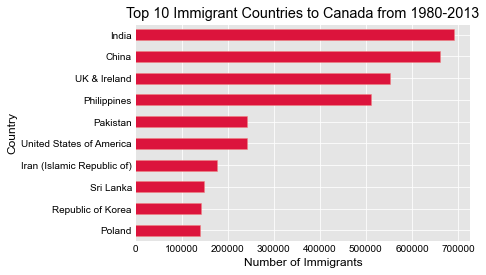

In [74]:
# Horizontal
plt.figure(figsize=(200, 100))
df_top10 = pd.DataFrame(df.nlargest(10,'total')['total'].sort_values(ascending = True))
df_top10.plot.barh(legend = False, color = 'crimson', edgecolor = 'lightcoral')
plt.title('Top 10 Immigrant Countries to Canada from 1980-2013',color = 'black')
plt.xlabel('Number of Immigrants',color = 'black')
plt.ylabel('Country',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('bar_horizontal.png')
plt.show()

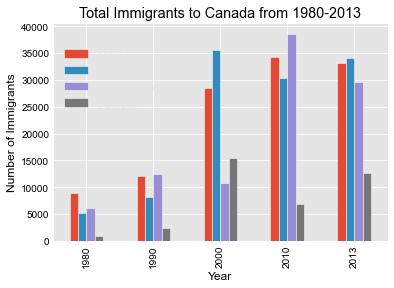

In [75]:
# Grouped
year_int10 = list(map(str, (1980,1990,2000,2010, 2013)))
df_group = pd.DataFrame(df.loc[['India','China','Philippines','Pakistan'],year_int10].T)
df_group.plot.bar(edgecolor = 'white')
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(title = 'Country', fontsize = 12)
plt.savefig('bar_grouped.png')
plt.show()

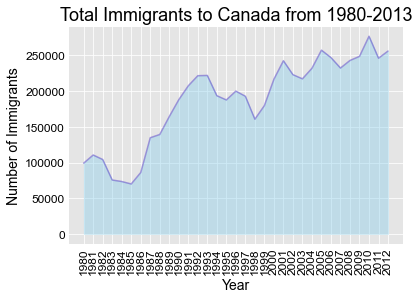

In [76]:
# simple area chart
plt.fill_between(df_tot.index, df_tot['total'], color="skyblue", alpha=0.4)
plt.plot(df_tot.index, df_tot['total'], color = 'Slateblue', alpha = 0.6)
plt.title('Total Immigrants to Canada from 1980-2013', fontsize = 18, color = 'black')
plt.yticks(fontsize = 12, color = 'black')
plt.xticks(fontsize = 12, rotation = 90, color = 'black')
plt.xlabel('Year', fontsize = 14, color = 'black')
plt.ylabel('Number of Immigrants', fontsize = 14, color = 'black')
plt.savefig('area_simple.png')
plt.show()

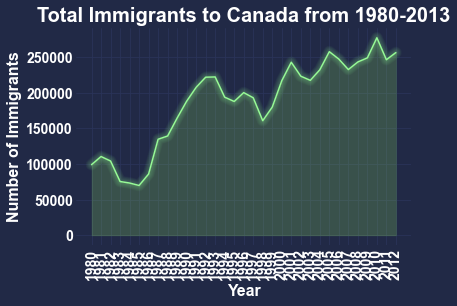

In [77]:
# cyberpunk simple area chart
import mplcyberpunk
style.use('cyberpunk')
plt.fill_between(df_tot.index, df_tot['total'], color = 'greenyellow', alpha = 0.1)
plt.plot(df_tot.index, df_tot['total'], color = 'palegreen', alpha = 1)
mplcyberpunk.add_glow_effects()
plt.title('Total Immigrants to Canada from 1980-2013', fontsize = 20,fontweight = 'bold', color = 'white')
plt.yticks(fontsize = 14, color = 'white',fontweight = 'bold')
plt.xticks(fontsize = 14, rotation = 90, color = 'white',fontweight = 'bold')
plt.xlabel('Year', fontsize = 16, color = 'white',fontweight = 'bold')
plt.ylabel('Number of Immigrants', fontsize = 16, color = 'white',fontweight = 'bold')
plt.savefig('cyber_area_simple.png')
plt.show()

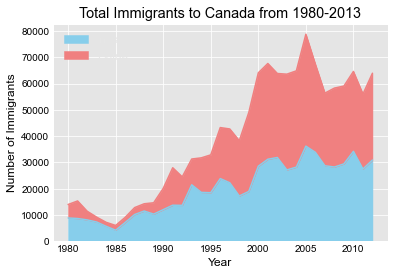

In [78]:
# stacked area chart
color = ['skyblue','lightcoral']
plt.style.use('ggplot')
top2_list = df.nlargest(2, 'total').index.tolist()
df_top2 = pd.DataFrame(df.loc[top2_list, years].T)
df_top2.plot(kind = 'area', stacked = True, color = color)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.legend(fontsize = 12)
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_stacked.png')
plt.show()

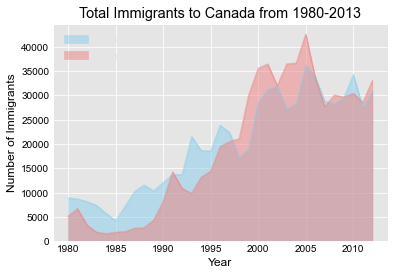

In [79]:
# unstacked area chart
df_top2.plot(kind = 'area', stacked = False, color = color)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(fontsize = 12)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_unstacked.png')
plt.show()

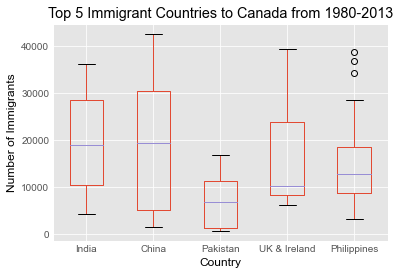

In [80]:
# Vertical Box Plot
df_box = pd.DataFrame(df.loc[['India','China','Pakistan','UK & Ireland','Philippines'], years].T)
df_box.plot(kind = 'box')
plt.title('Top 5 Immigrant Countries to Canada from 1980-2013', color = 'black')
plt.xlabel('Country', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.savefig('box_vertical.png')
plt.show()

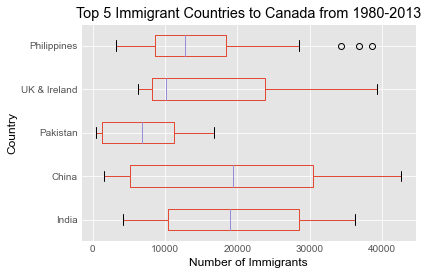

In [81]:
# horizontal box plot
df_box.plot(kind = 'box', vert = False)
plt.title('Top 5 Immigrant Countries to Canada from 1980-2013', color = 'black')
plt.ylabel('Country', color = 'black')
plt.xlabel('Number of Immigrants', color = 'black')
plt.savefig('box_horizontal.png')
plt.show()

C:\Users\84816\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


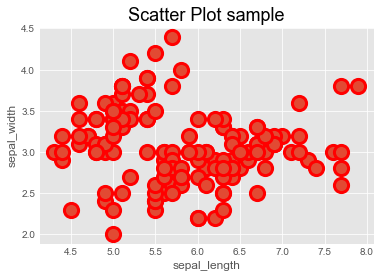

In [82]:
import seaborn as sb
df_iris = sb.load_dataset('iris')

sb.scatterplot('sepal_length','sepal_width', data = df_iris, s = 200, linewidth = 3, edgecolor = 'Red')
plt.title('Scatter Plot sample', color = 'black', fontsize = 18)
plt.savefig('scatter.png')
plt.show()

C:\Users\84816\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\84816\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


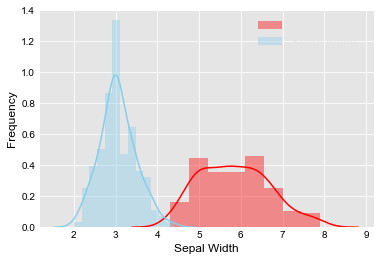

In [83]:
df_iris = sb.load_dataset('iris')

sb.distplot(df_iris['sepal_length'], color = 'Red', label = 'Sepal Length')
sb.distplot(df_iris['sepal_width'], color = 'skyblue', label = 'Sepal Width')
plt.legend(fontsize = 12)
plt.xlabel('Sepal Width', color = 'black')
plt.ylabel('Frequency', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('histogram.png')

plt.show()

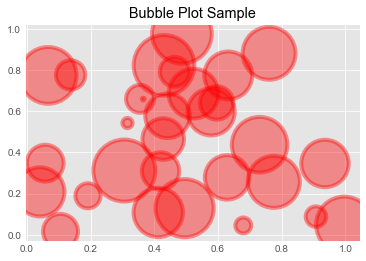

In [84]:
# Bubble Plot

x = np.random.rand(1,30,1)
y = np.random.rand(1,30,1)
size = np.random.rand(1,30,1)

plt.scatter(x,y,s = size*4000, alpha = 0.4, color = 'r', edgecolor = 'Red', linewidth = 4)
plt.title('Bubble Plot Sample', color = 'black')
plt.savefig('bubble.png')

plt.show()

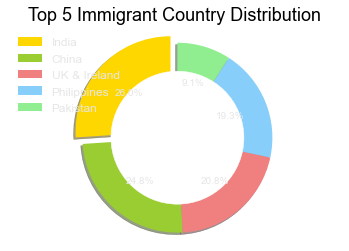

In [85]:
# Doughnut Chart

top5_list = df.nlargest(5, 'total').index.tolist()
df_top5 = pd.DataFrame(df.loc[top5_list, 'total'].T)
circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

plt.pie(df_top5['total'], autopct = '%1.1f%%', shadow = True, explode = [0.1,0,0,0,0], colors = colors, startangle = 90)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.legend(df_top5.index, fontsize = 12, loc = 'upper left')
plt.title('Top 5 Immigrant Country Distribution', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut.png')

plt.show()

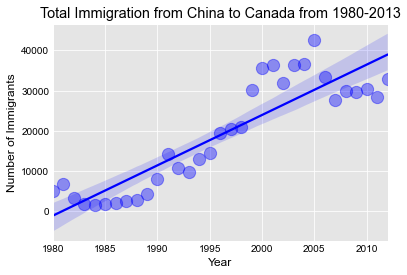

In [86]:
# Strong trend

df_reg = pd.DataFrame(df.loc['China',years])
df_reg.reset_index(inplace = True)
df_reg.rename(columns = {'index':'year'}, inplace = True)
df_reg[['year','China']] = df_reg[['year','China']].astype(int)

sb.regplot(x = 'year', y = 'China', data = df_reg, color = 'b', scatter_kws = {'s':150,'alpha':0.4})
plt.title('Total Immigration from China to Canada from 1980-2013', color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('reg_strong.png')

plt.show()

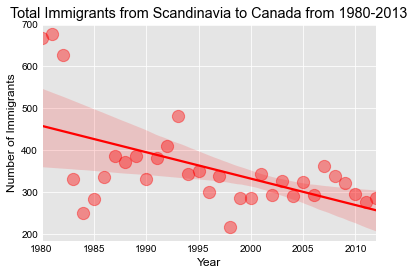

In [87]:
# Weak trend

df_reg1 = pd.DataFrame(df.loc[['Denmark','Norway','Sweden'],years].sum())
df_reg1.reset_index(inplace = True)
df_reg1.rename(columns = {'index':'year',0:'total'}, inplace = True)
df_reg1[['year','total']] = df_reg1[['year','total']].astype(int)

sb.regplot(x = 'year', y = 'total', data = df_reg1, color = 'Red', scatter_kws = {'s':150,'alpha':0.4})
plt.title('Total Immigrants from Scandinavia to Canada from 1980-2013', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.savefig('reg_weak.png')

plt.show()

In [88]:
!pip install wordcloud

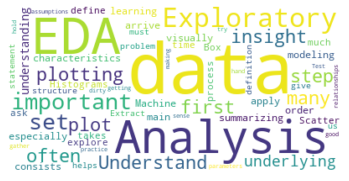

In [89]:
# word cloud

from wordcloud import WordCloud, STOPWORDS

text = open('sample.txt', 'r', encoding = 'utf-8').read()
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', max_words = 200, stopwords = stopwords)

wordcloud.generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')

plt.show()

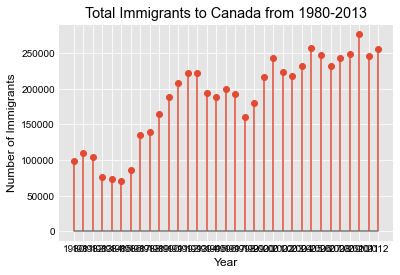

In [90]:
# Lollipop chart

plt.stem(df_tot.index, df_tot['total'])
plt.title('Total Immigrants to Canada from 1980-2013', color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('lollipop.png')

plt.show()